
# Train Soccer Pitch Keypoint Detector

In [1]:
!nvidia-smi

Tue Mar 11 23:02:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install dependencies

In [3]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

## Imports

In [4]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("football-ld4sl").project("football-field-detection-radku")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-Field-Detection-1 in yolov8:: 100%|██████████| 646/646 [00:00<00:00, 5356.68it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [6]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [9]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=300 imgsz=640 mosaic=0.0 plots=True

/content
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/content/datasets/Football-Field-Detection-1/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

In [11]:
!ls {HOME}/runs/pose/train3/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    PoseF1_curve.png  train_batch4640.jpg
BoxP_curve.png					    PoseP_curve.png   train_batch4641.jpg
BoxPR_curve.png					    PosePR_curve.png  train_batch4642.jpg
BoxR_curve.png					    PoseR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       val_batch1_labels.jpg
events.out.tfevents.1741735171.813d5ddf3023.5097.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg  weights


/content


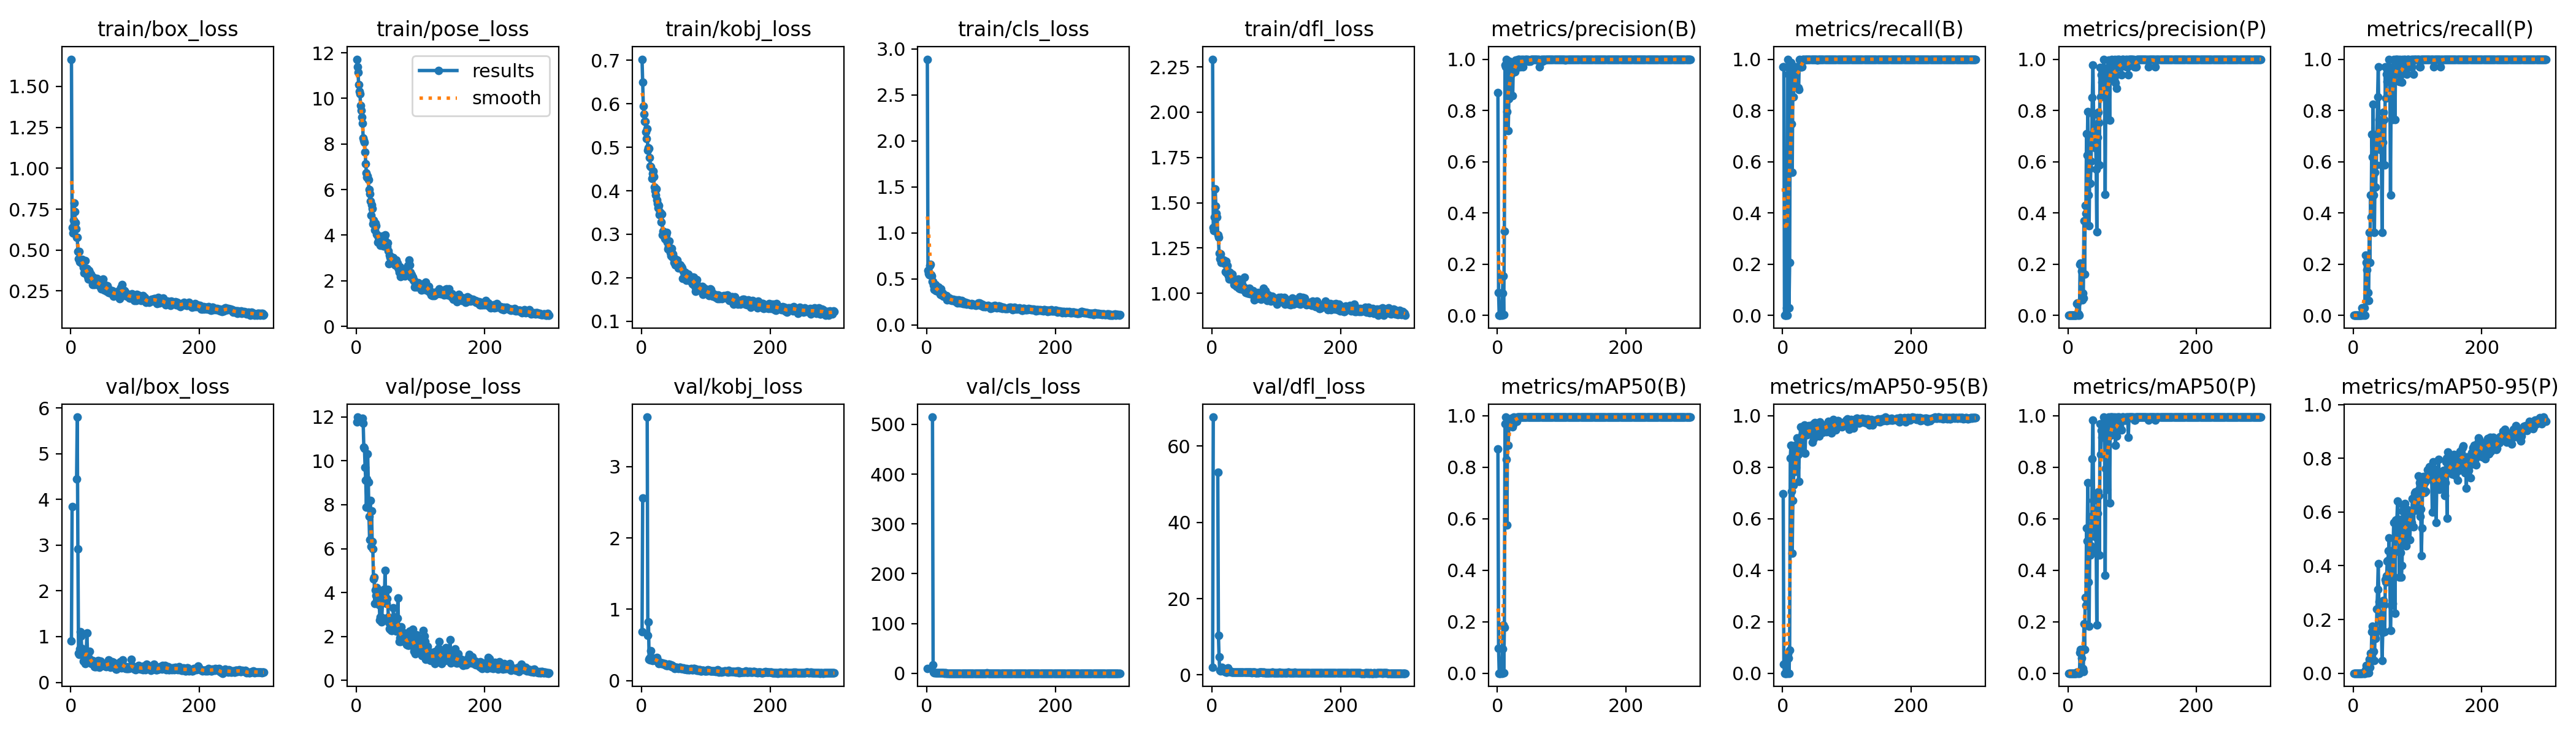

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/results.png', width=600)

/content


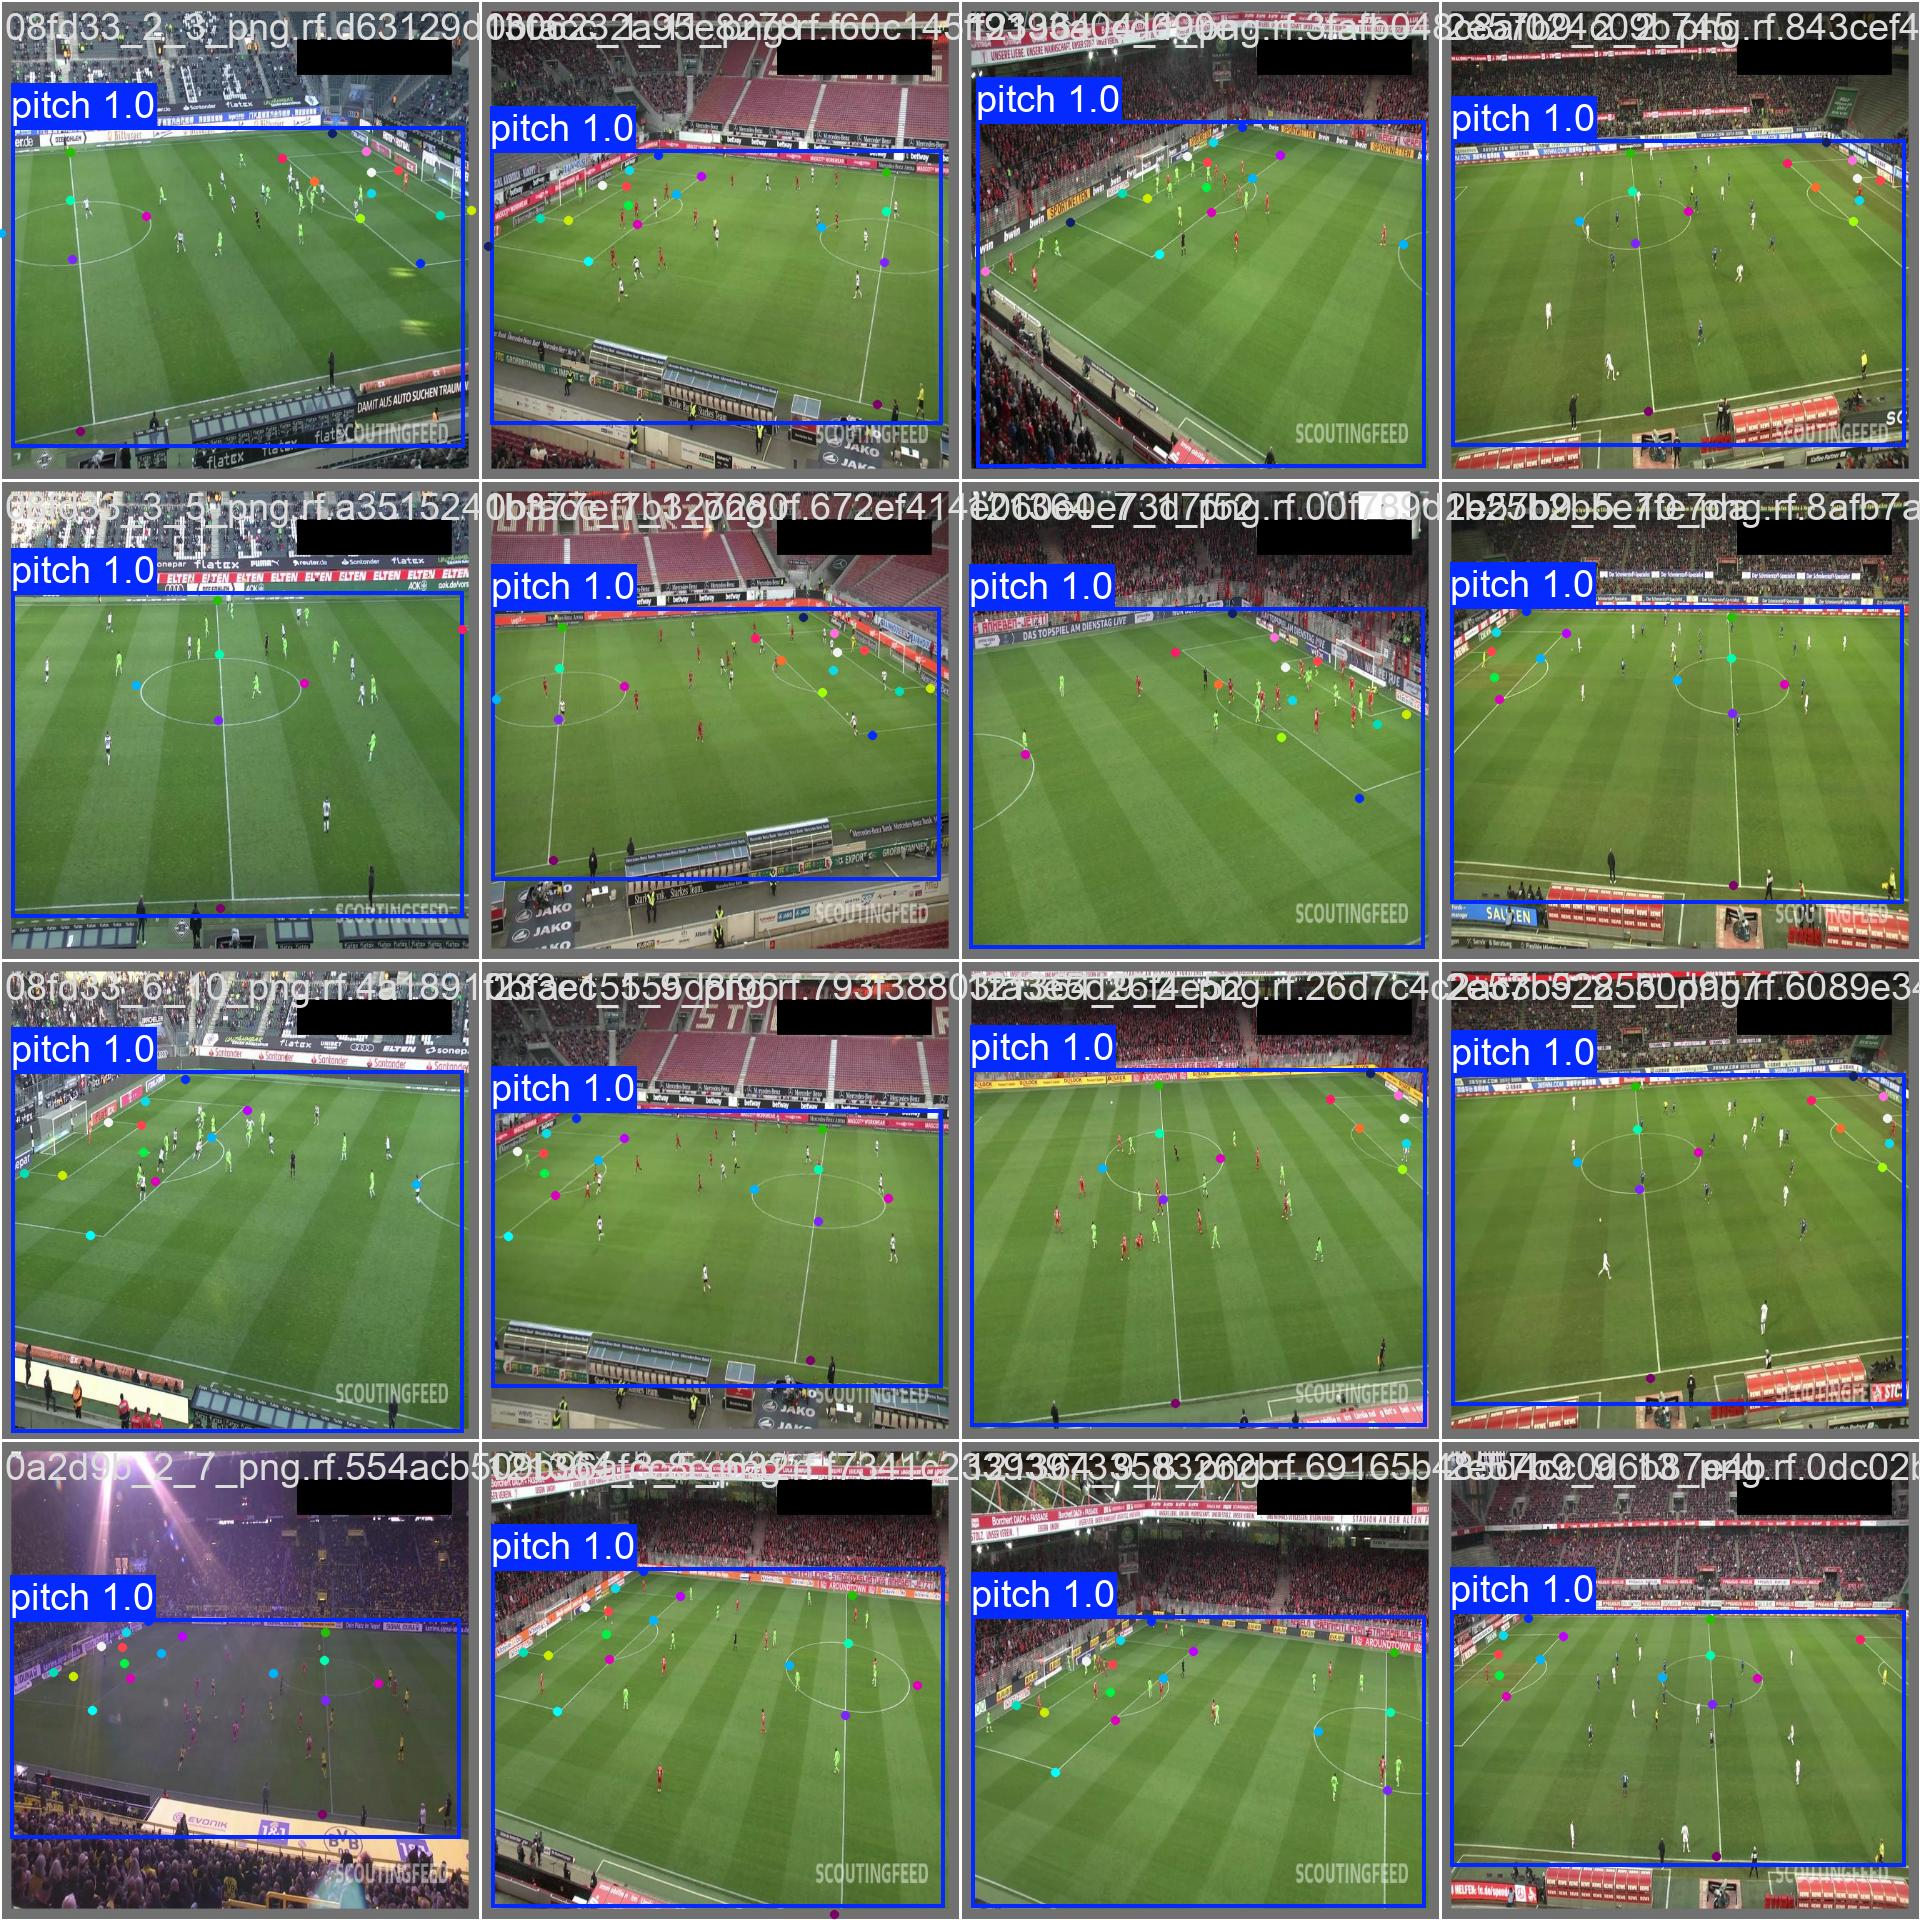

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/val_batch0_pred.jpg', width=600)

## Validate custom model

In [14]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-pose summary (fused): 121 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Scanning /content/datasets/Football-Field-Detection-1/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.03s/it]
                   all         34         34          1          1      0.995      0.993          1          1      0.995      0.953
Speed: 0.4ms preprocess, 69.3ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/pose/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Deploy model on Roboflow

In [16]:
project.version(dataset.version).deploy(model_type="yolov8-pose", model_path=f"{HOME}/runs/pose/train3/")

Dependency ultralytics==8.0.196 is required but found version=8.3.88, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/football-ld4sl/football-field-detection-radku/1
Share your model with the world at: https://universe.roboflow.com/football-ld4sl/football-field-detection-radku/model/1


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
